# 사이킷런을 활용한 추천 시스템 입문

### 추천 시스템이란?

추천 시스템을 한마디로 표현하면,

          사용자(user)에게 관련된 아이템(item)을 추천해 주는 것


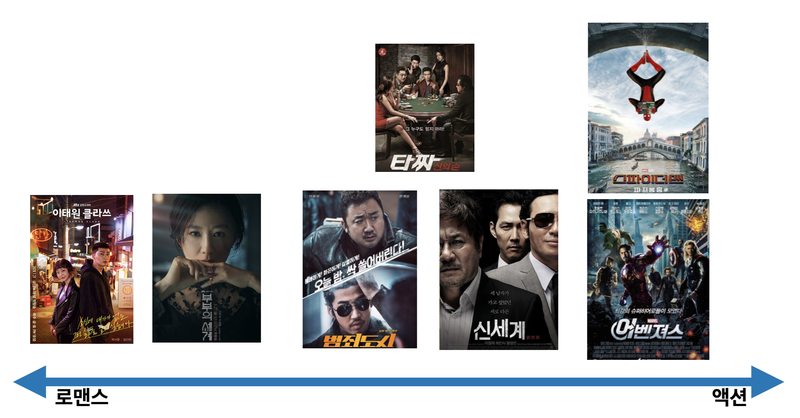

거리가 좁으면 좁을수록 유사도가 높다고 할 수 있다. 즉, 사용자와 관련된 항목을 찾아 추천해 줄 수 있다.

1. 범주형 데이터를 다룬다. -> 액션물, 로맨스물, 스릴러물, 한드, 미드, 일드, 영드 등의 영화 item 데이터. 이러한 데이터는 연속적(continuous)이지 않고 이산적(discrete)이다. 이를 범주형(categorical) 데이터라고 한다.

2. (숫자 벡터로 변환한 뒤) 유사도를 꼐산한다 -> 범주형 데이터들을 좌표에 나타내었는데, 좌표에 나타내기 위해서는 숫자로 이루어진 벡터(numerical vector)로 변환해야 한다. 그리고 그 거리를 계산하여 유사도를 계산한다.

### 코사인 유사도

그럼 실제로 어떻게 범주형 데이터들을 벡터로 변환한 뒤 유사도를 계산할 수 있을까? 유사도를 계산하는 방법 중 가장 잘 알려진 방법은 코사인 유사도(Cosine Similarity) 이다. 코사인 유사도는 두 벡터 간의 코사인 값을 이용해 두 벡터의 유사도를 계산한다. 

코사인 유사도는 두 벡터의 방향이 이루는 각에 코사인을 취해 구한다. 따라서, 두 벡터의 방향이 완전히 동일한 경우는 1, 90도의 각을 이루면 0, 반대 방향, 즉 각이 180도면 -1 값을 갖게 된다. 따라서 코사인 유사도는 -1 ~ 1 사이의 값이고, 1에 가까울 수록 유사도가 높다고 할 수 있다.

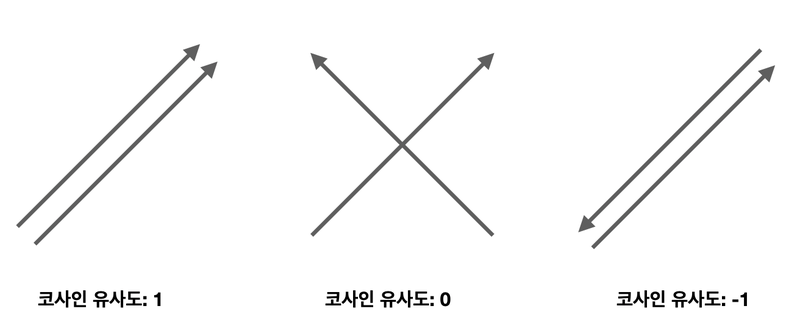

우선 숫자 벡터가 만들어졌다고 가정한 뒤, 코사인 유사도를 계산하는 방법을 알아보겠다.

#### Numpy 활용

In [1]:
import numpy as np

t1 = np.array([1, 1, 1])
t2 = np.array([2, 0, 1])

위와 같이 숫자 벡터가 있다고 가정하자. 위의 식을 참고해 코사인 유사도를 구하는 함수를 만들어 본다.

In [2]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(A, B):
	return dot(A, B)/(norm(A)*norm(B))

In [3]:
cos_sim(t1, t2)

0.7745966692414834

#### 사이킷런 활용

위 방법을 좀 더 간편하게 구할 수 있다. 사이킷런에서 코사인 다음 모듈을 임포트 해주면 쉽게 사용할 수 있다.

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

해당 모듈은 입력값으로 2차원 배열을 받기 때문에, 2차원 배열로 정의해 준다.

In [5]:
t1 = np.array([[1, 1, 1]])
t2 = np.array([[2, 0, 1]])
cosine_similarity(t1,t2)

array([[0.77459667]])

배열 형태로 코사인 유사도가 나왔습니다만 코사인 유사도는 0.755로 동일하게 나온다.

 코사인 유사도 이외에도 유클리드 거리, 자카드 유사도, 피어슨 상관계수 등의 다른 방법으로 유사도를 계산할 수 있다.

### 추천시스템의 종류

본격적으로 추천 시스템에 대해 알아보자. 가장 기본적으로 알려진 추천의 방식으로는 협업 필터링 방식과 콘텐츠 기반 필터링 방식이 있다. 더 나아가서는 딥러닝 등을 활용한 추천 방법과 여러 방법을 결합한 하이브리드(Hybrid) 방법도 있다.

협업 필터링 방식은 다시 사용자 기반과 아이템 기반 그리고 잠재요인 협업 필터링 방식으로 나뉜다.

추천 시스템의 종류를 요약하면 다음과 같다.


▶︎ 콘텐츠 기반 필터링(Content Based Filtering)

▶︎ 협업 필터링(Collaborative Filtering)

1. 사용자 기반

2. 아이템 기반

3. 잠재요인 협업 필터링 (latent factor collaborative filtering) -> 행렬 인수분해 (matrix factorization)

▶︎ Deep Learning 적용 or Hybrid 방식

여기서는 기본 2가지 추천 시스템인 콘텐츠 기반 필터링과 협업 필터링에 대해 알아보도록 하겠다.

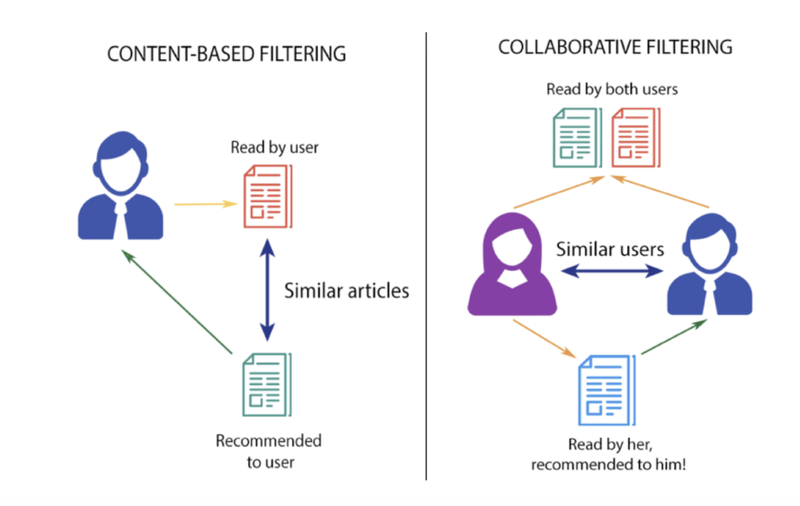

### 콘텐츠 기반 필터링

#### 콘텐츠 기반 필터링(Content Based Filtering)

위에서 언급했던 영화 추천 방식을 다시 생각해 보자. 어떤 사람이 한 영화를 좋아했다면, 비슷한 콘텐츠의 아이템을 추천하는 방식이다. 쉽게 말하자면, 아이언맨1을 봤으면 아이언맨2, 아이언맨3을 추천해주고 마블 영화를 추천해 주는 것이다. 콘텐츠 기반은 순수하게 콘텐츠의 내용만을 비교해서 추천해주는 방식이다.

영화에서 비슷한 콘텐츠는 무엇을 말할까? 우리가 영화를 고를 때 어떤 기준으로 고르는지 생각해 보면 된다. 장르, 배우, 감독 등의 정보를 가지고 영화를 고른다. 이런 정보들이 영화의 특성(feature)이 되고, 이 특성이 '콘텐츠'가 비슷하다고 말할 수 있는 요인이 된다.


#### 콘텐츠 기반 필터링 실습

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
import os
csv_path = '/content/drive/MyDrive/movie_dataset.csv'
df = pd.read_csv(csv_path)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [9]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

데이터의 칼럼들이 꽤 많다. 이 각각의 칼럼을 특성으로 볼 수 있지만, 여기서는 다음과 같은 특성만 고려하여 영화의 유사도를 계싼하여 추천하도록 하겠다.

In [10]:
features = ['keywords','cast','genres','director']
features

['keywords', 'cast', 'genres', 'director']

In [11]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

combine_features(df[:5])

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
dtype: object

In [12]:
for feature in features:
    df[feature] = df[feature].fillna('')

df["combined_features"] = df.apply(combine_features,axis=1)
df["combined_features"]

0       culture clash future space war space colony so...
1       ocean drug abuse exotic island east india trad...
2       spy based on novel secret agent sequel mi6 Dan...
3       dc comics crime fighter terrorist secret ident...
4       based on novel mars medallion space travel pri...
                              ...                        
4798    united states\u2013mexico barrier legs arms pa...
4799     Edward Burns Kerry Bish\u00e9 Marsha Dietlein...
4800    date love at first sight narration investigati...
4801     Daniel Henney Eliza Coupe Bill Paxton Alan Ru...
4802    obsession camcorder crush dream girl Drew Barr...
Name: combined_features, Length: 4803, dtype: object

여기서는 간단하게 보기 위해 해당 특성을 텍스트 데이터로 보고, 보고자 하는 특성으로 이루어진 텍스트 데이터를 새로운 칼럼으로 생성했다.

#### 벡터화하고, 코사인 유사도를 계산한다.

이제 이 칼럼을 벡터화하고, 코사인 유사도를 계산해보겠다. 장르, 배우명, 감독명의 텍스트 데이터를 범주형 데이터로 보기 때문에 단순하게 등장횟수를 세어 숫자 벡터로 만들겠다. 사이킷런의 CountVectorizer()를 사용하면 편하게 하실 수 있다.

In [13]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
print(type(count_matrix))
print(count_matrix.shape)
print(count_matrix)

<class 'scipy.sparse.csr.csr_matrix'>
(4803, 14845)
  (0, 3115)	1
  (0, 2616)	1
  (0, 4886)	1
  (0, 12386)	2
  (0, 14235)	1
  (0, 2755)	1
  (0, 12299)	1
  (0, 11517)	1
  (0, 14561)	1
  (0, 14820)	1
  (0, 11490)	1
  (0, 12134)	1
  (0, 14291)	1
  (0, 12567)	1
  (0, 7496)	1
  (0, 8831)	1
  (0, 11217)	1
  (0, 86)	1
  (0, 144)	1
  (0, 4435)	1
  (0, 11745)	1
  (0, 4566)	1
  (0, 6542)	1
  (0, 2061)	1
  (1, 86)	1
  :	:
  (4801, 10069)	1
  (4801, 5844)	1
  (4801, 252)	1
  (4801, 4098)	1
  (4801, 14796)	1
  (4801, 11361)	1
  (4801, 2978)	1
  (4801, 12036)	1
  (4801, 6138)	1
  (4802, 9659)	1
  (4802, 3812)	1
  (4802, 1788)	2
  (4802, 4210)	1
  (4802, 5181)	1
  (4802, 2912)	1
  (4802, 3821)	1
  (4802, 1069)	1
  (4802, 11185)	1
  (4802, 3681)	1
  (4802, 5399)	1
  (4802, 3894)	1
  (4802, 2056)	1
  (4802, 3093)	1
  (4802, 4502)	1
  (4802, 5900)	2


count_matrix는 type을 확인해 본 결과, CSR(Compressed Sparse Row) Matrix였다. CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보로만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조이다.

예를 들어, (0, 3115) 1라고 되어 있는 것은 1번째 row는 3116번째 단어가 1번 출현한다는 뜻이다. 이 데이터셋에는 총 14845개의 단어가 존재하는데, 이 단어들을 범주형으로 보고 그 단어의 출현 빈도만을 표시한 Matrix가 매우 Sparse하기 때문에 공간을 절약할 수 있는 형태로 표현한 것이다.

이제 4803개의 영화들이 모두 Vectorized되었다. 이 영화들끼리의 코사인 유사도를 표현하는 4803X4803 의 cosine_similarity matrix를 구해본다.



In [14]:
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)
print(cosine_sim.shape)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]
(4803, 4803)


#### 추천

코사인 유사도로 계산된 가장 비슷한 영화를 3편을 선별하여 추천해 보겠다.

In [15]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

i=0
print(movie_user_likes+"와 비슷한 영화 3편은 "+"\n")
for item in sorted_similar_movies:
    print(get_title_from_index(item[0]))
    i=i+1
    if i==3:
        break

Avatar와 비슷한 영화 3편은 

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1


아바타와 유사한 영화 3편은 가디언즈 오브 갤럭시, 에이리언, 스타워즈로 나왔다.

### 협업 필터링 (1) 협업 필터링의 종류

협업 필터링(Collaborative Filtering) 은 과거의 사용자 행동 양식(User Behavior) 데이터를 기반으로 추천하는 방식이다. 여기서 다루는 학습용 데이터 자체에서 사용자 행동양식을 나타내기 어렵지만, 잠재요인 기법을 활용하면 행동양식을 어느 정도 데이터로 나타낼 수 있다.

우선은 협업 필터링의 기본 원리를 살펴보자. 영화 추천을 예시로 들어보겠다. 아래 표를 살펴보자. 사용자들의 정보는 user_id에 저장되어 있다. 그리고 영화 정보는 item_id아다. 사용자는 영화를 보고 평점 (rating)을 매겼다. 그 평점을 매긴 시각이 timestamp 칼럼에 기록되어있다.

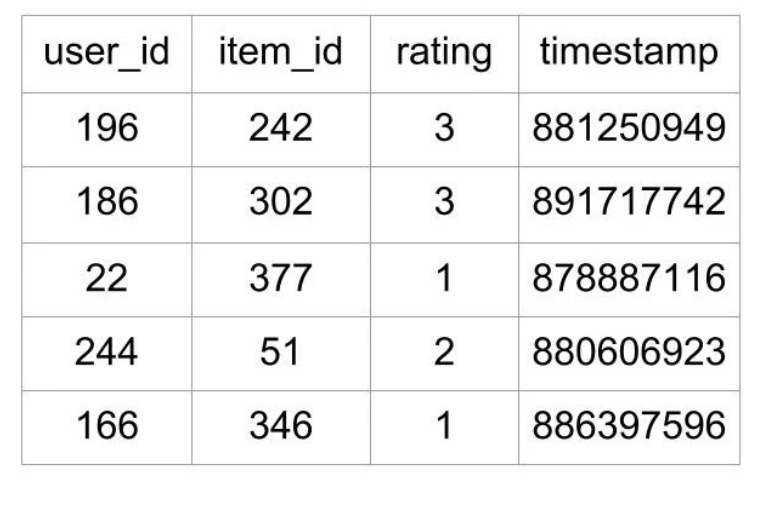

위 대이터를 사용자와 아이템 간 interaction matrix로 변환한다. 해당 행렬의 데이터로 평점을 넣으면 아래와 같은 형태가 된다. 우리는 이를 평점행렬이라고 부른다.

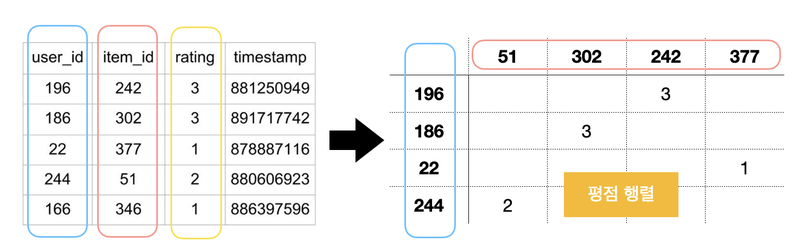

이러한 행렬을 실제 데이터로 만든다면 굉장희 희소(sparse)한 행렬이 만들어진다. 유튜브나 넷플릭스에는 몇 억개의 동영상이 있고, 몇 억의 사용자가 모든 동영상을 다 봤을리 만무하다. 따라서 대부분 평점에 대한 데이터는 0이다.

협업 필터링의 종류에는 크게 사용자 기반과 아이템 기반 그리고 잠재요인(latent factor) 방식이 잇다고 한다. 사용자 기반과 아이템 기반은 유사도를 계산하는 방식이고 잠재요인은 행렬 인수분해(matrix factorization)를 이용해 잠재요인을 분석한다. 넷플릭스의 추천 시스템에 잠재요인 분석을 사용하여 최근에는 잠재요인을 분석하는 사례가 많아지고 있는 추세이다. 즉, 위에서 설명한 평점행렬로 변환한후, 평점행렬의 유사도를 계산하여 추천하는 방식은 사용자 기반과 아이템 기반 방식이다. 그리고 이 평점행렬을 분해하여 더 많은 정보들ㅇ을 고려하는 방식이 잠재요인 필터링이다.

#### 사용자 기반

최근접 이웃 협업 필터링은 다시 사용자 기반과 아이템 기반으로 나뉜다고 했다. 이 방식은 동일한 제품에 대해 평점을 매긴 데이터를 분석하여 추천을 하는 방식이다.

사용자 기반 협업 필터링은 아래와 같은 문구로 요약할 수 있다.

            당신과 비슷한 고객들이 다음 상품을 구매했다.

그럼 자세한 과정을 한 번 알아보자.

여기 사용자와 아이템 간의 평점행렬이 있다. User4가 item1을 구매하였다. 그리고 User4와 가장 유사한 User2는 item1 ~ 4까지 다음과 같이 평점을 매겼다.

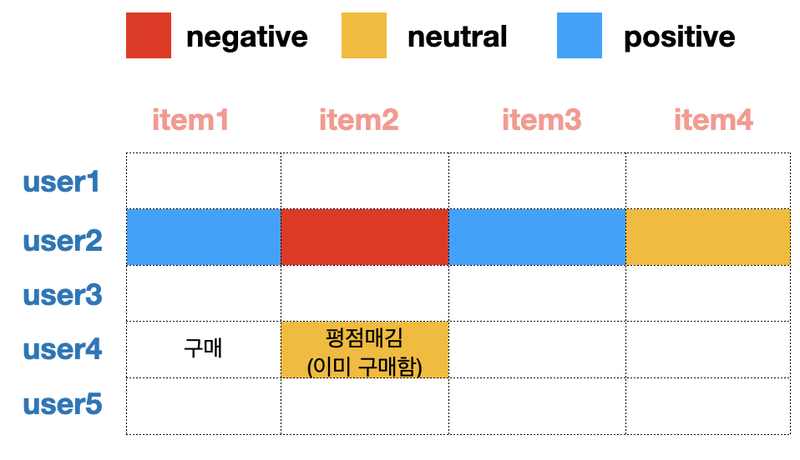

그러면 어떤 제품을 추천해 주면 좋을까?

User2가 선호한 제품인 item3을 User4에게 추천해 주는 방식이다.

#### 아이템 기반

아이템 기반은 아이템 간의 유사도를 측정하여 해당 아이템을 추천하는 방식이다.

일반적으로 사용자 기바보다는 아이템 기반 방식이 정확도가 더 높다고 한다. 아이템 기반 협업 필터링은 아래와 같은 문구로 요약할 수 있다.

              이 상품을 선택한 다른 고객들은 다음 상품을 구매했다.

이 방식은 다음과 같은 순서로 진행한다.

User2가 선호하는 아이템이 있다. 그 아이템은 item1이네요.

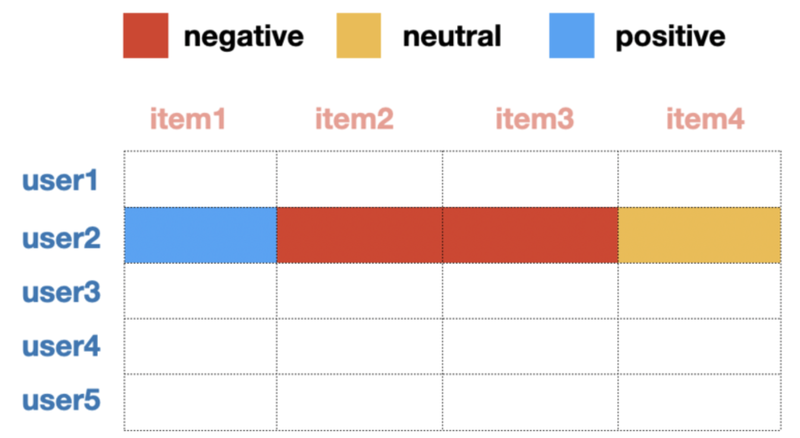

그럼 그 아이템에 대한 다른 Use들의 선호도를 조사한다.

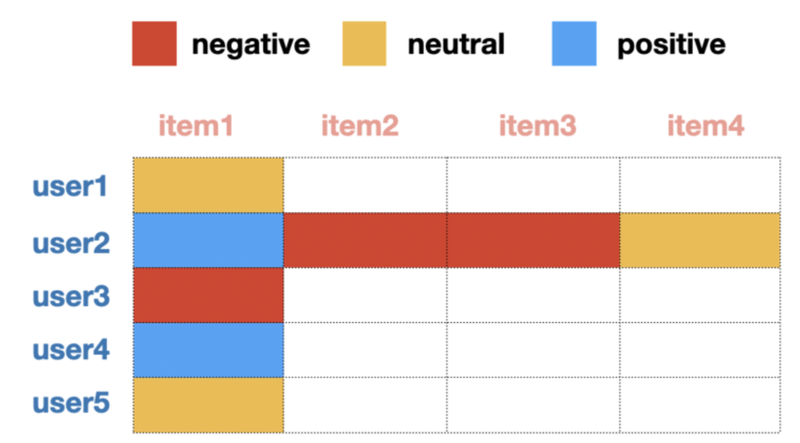

item1을 좋아한 사람은 user4이다. 그 user4에게 user2가 좋아한 상품인 item3을 추천해 준다.

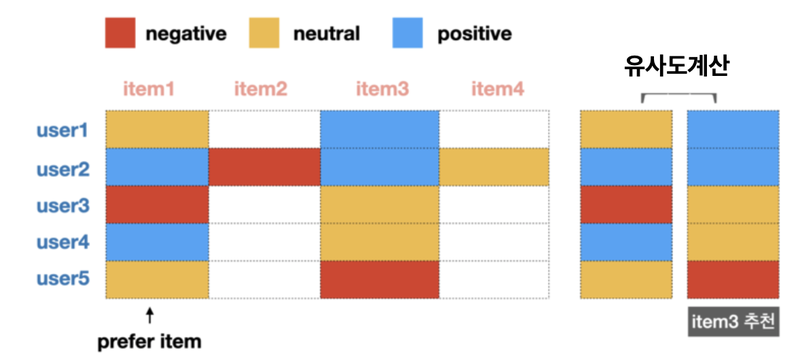

즉, 사용자 기반과 아이템 기반을 요약하면 다음과 같다.

            사용자 기반 : 당신과 비슷한 고객들이 다음 상품을 구매했다.

            아이템 기반 : 이 상품을 선택한 다른 고객들은 다음 상품을 구매했다.

### 협업 필터링 (2) 행렬 인수분해

잠재요인 협업 필터링은 평점행렬을 행렬 인수분해(matrix factorization)를 통해 잠재요인(latent facor)을 분석한다. 일단 행렬 인수분해가 처음이신 분들도 있을테니 행렬 인수분해에 대해 잠깐 살펴보겠다.

행렬 인수분해에는 다음과 같은 기법들이 있다.

SVD(Singular Vector Decomposition)

ALS(Alternating Least Squares)

NMF(Non-negative Matrix Factorization)

행렬 인수분해는 인수분해와 비슷하다고 볼 수 있다. 30을 인수분해하면 30 = 6x5 = 3x10 = 1x30이런 식으로 곱하기로 나타낼 수 있다. 행렬도 이렇게 곱으로 분해 할 수 있으며, 분해 행렬을 사용하면 원하는 답을 더 쉽게 찾을 수 있다. (나중에 이야기 하겠지만, 추천 알고리즘에서 파리미터 수가 줄어 든다.)

SVD

우선, 많이 사용되는 행렬 인수분해 방식인 SVD를 설명 드리겠다.

SVD(Sigular Vector Decomposition)는 우리나라 말로 하면 특잇값 분해이다.

쉽게 이야기 하면, M X N 형태의 행렬 A을 다음과 같은 형태로 분해하여 나타내는 것이다.

그림으로 표현하면 다음과 같다.


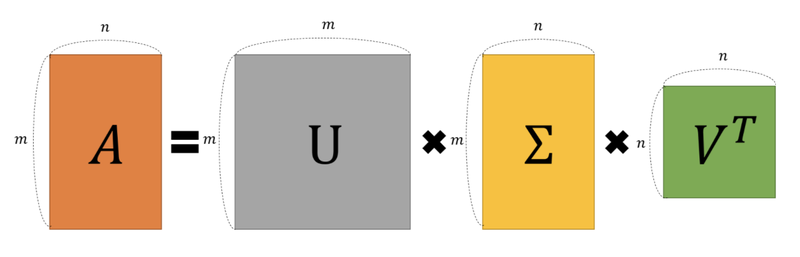

#### SVD 실습

SVD는 NumPy에 이미 구현되어 있다.

구현하기 전에 아래 스팩을 한 번 확인해 보자.

이제 직접 이 함수를 써본다.

numpy.linalg의 svd 모듈을 import한 후, 4 x 4 형태의 행렬 A를 SVD해보도록 하겠다.

In [16]:
import numpy as np
from numpy.linalg import svd

In [17]:
np.random.seed(30)
A = np.random.randint(0, 100, size=(4, 4))
A

array([[37, 37, 45, 45],
       [12, 23,  2, 53],
       [17, 46,  3, 41],
       [ 7, 65, 49, 45]])

In [18]:
svd(A)

(array([[-0.54937068, -0.2803037 , -0.76767503, -0.1740596 ],
        [-0.3581157 ,  0.69569442, -0.13554741,  0.60777407],
        [-0.41727183,  0.47142296,  0.28991733, -0.72082768],
        [-0.6291496 , -0.46389601,  0.55520257,  0.28411509]]),
 array([142.88131188,  39.87683209,  28.97701433,  14.97002405]),
 array([[-0.25280963, -0.62046326, -0.4025583 , -0.6237463 ],
        [ 0.06881225, -0.07117038, -0.8159854 ,  0.56953268],
        [-0.73215039,  0.61782756, -0.23266002, -0.16767299],
        [-0.62873522, -0.47775436,  0.34348792,  0.50838848]]))

결과값으로 행렬 U와 행렬 Σ, 행렬 V의 전치행렬이 생성된다. 우리는 이 값들을 unpacking해서 각각 변수명에 할당해 준다. 각 행렬들을 확인해 보자.



In [19]:
U, Sigma, VT = svd(A)

print('U matrix: {}\n'.format(U.shape),U)
print('Sigma: {}\n'.format(Sigma.shape),Sigma)
print('V Transpose matrix: {}\n'.format(VT.shape),VT)

U matrix: (4, 4)
 [[-0.54937068 -0.2803037  -0.76767503 -0.1740596 ]
 [-0.3581157   0.69569442 -0.13554741  0.60777407]
 [-0.41727183  0.47142296  0.28991733 -0.72082768]
 [-0.6291496  -0.46389601  0.55520257  0.28411509]]
Sigma: (4,)
 [142.88131188  39.87683209  28.97701433  14.97002405]
V Transpose matrix: (4, 4)
 [[-0.25280963 -0.62046326 -0.4025583  -0.6237463 ]
 [ 0.06881225 -0.07117038 -0.8159854   0.56953268]
 [-0.73215039  0.61782756 -0.23266002 -0.16767299]
 [-0.62873522 -0.47775436  0.34348792  0.50838848]]


잘 분해가 된다. 이제 다시 복원해 보겠다. 복원을 위해서는 U, Σ, VT를 내적한다. 한 가지 유의할 사항은 Σ는 1차원 이므로 0을 포함한 대각 행렬로 변환한 뒤 내적을 해주어야한다.

In [20]:
Sigma_mat = np.diag(Sigma)

A_ = np.dot(np.dot(U, Sigma_mat), VT)
A_

array([[37., 37., 45., 45.],
       [12., 23.,  2., 53.],
       [17., 46.,  3., 41.],
       [ 7., 65., 49., 45.]])

복원된 A_와 원본 A가 같은지 확인해 보자.

#### Truncated SVD

추천 시스템에서의 행렬 인수분해는 SVD 중에서도 Truncated SVD를 사용한다.

Truncated SVD는 SVD의 일종으로 우리말로 번역하면 잘린 SVD라고한다. 다른 말로 LSA(Latent semantic analysis), 잠재 의미 분석 이라고 번역할 수 있다. Truncated SVD를 이용해 분해한 뒤 복원하면 SVD 처럼 완벽히 같은 행렬이 나오지 않는다. 그 이유는 Truncated SVD는 차원을 축소한 다음 행렬을 분해하기 때문이다.

사이킷런에서는 TruncatedSVD 기능을 함수로 제공해 준다.

### 협업 필터링 (3) 행렬 인수분해와 잠재요인 협업 필터링

SVD(특이값 분해)를 평가행렬에 적용하여 잠재요인을 분석하는 것을 도식화하여 아래와 같다.

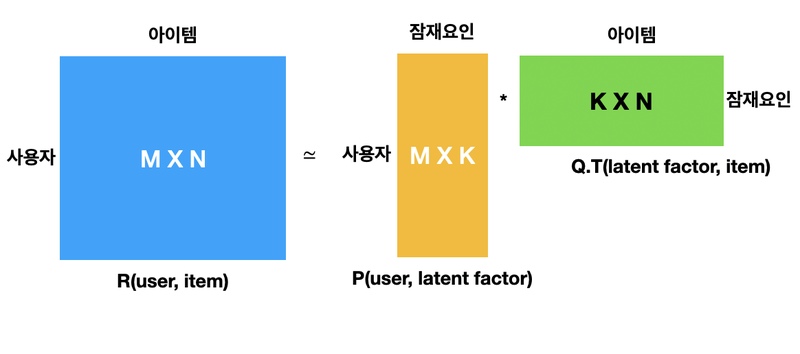

표기법

R : 사용자와 아이템 사이의 행렬

P : 사용자와 잠재요인 사이의 행렬

Q : 아이템과 잠재요인 사이의 행렬 -> 전치 행렬 형태로 나타낸다.

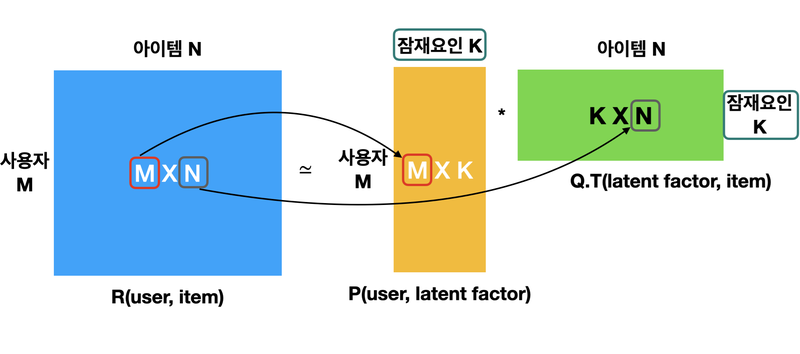

사용자가 아이템에 대한 평점을 매기는 요인으로 많은 항목들이 있을 것이다. "배우가 마음에 들어서, 감독이 좋아서, 좋아하는 장르나 분위기, 마침 그날 영화 가격이 매우 싸서" 등 평점을 매기는 것은 지극히 주관적이다. 사람의 마음은 알 수가 없다.

그래서 사용자가 평점을 매기는 요인을 그냥 "잠재요인"으로 취급한 뒤 그걸 SVD기법을 이용해 분해한 뒤 다시 합치는 방법으로 영화에 평점을 매긴 이유를 벡터화하여 이를 기반으로 추천한다. 이 기법은 넷플릭스나 왓챠, 유튜브 같은 대 기업에서 사용하여 그 효과를 입증해 내었고 이후 많은 기업들이 이 기법을 채택하여 사용하고 있다.

### 실제 추천 시스템

이상으로 추천 시스템의 기본에 대해 살펴 보았다. 실제로 YouTube나 Netflix 같은 대형 기업에서는 추천에 더 많은 것들을 고려한다.

사용자의 구매 여부와 평점 데이터 뿐만 아니라 얼마나 오랜 시간 동안 시청(혹은 해당 웹 사이트에 머물렀는지), 어떤 사이트에서 유입이 되었는지, 그리고 시청한 뒤 구매로 이어지기까지의 시간 등 우리의 족적들을 다 분석한다. 이를 전문 용어로 Digital Footprint(디지털 발자국), Digital Shadow(디지털 그림자)라고 한다.

그리고 이중에서 가장 중요한 지표가 바로 클릭률 이다. 전문 용어로는 CTR(Click Through Rate) 이다. CTR은 마케팅에서도 중요한 지표로 작용하는 용어이기도한다.

이러한 데이터들을 모아 추천을 한 뒤, 해당 아이템이 적절한 추천인지 여부를 평가하는 것 역시 중요한 일이다. 추천한 제품이 구매로 이어졌는지를 통해 추천에 성공했는지를 평가하기도 하고 모델 단계에서 평가하기도 한다.

이처럼, 추천 시스템은 굉장히 큰 시스템이다. 데이터를 기반으로 사용자에게 적절한 제품을 추천한다는 것 그리고 그것이 구매로 이어지는것은 매출과 직결되는 문제이기도 한다. 좋은 추천 시스템을 만들기 위해서는 어떤 데이터를 쓸지 많은 고민이 필요하다. 사용자와 연관성이 있고, 구매와 직결되는 각종 데이터를 수집하고 정렬(sorting)하여 다시 순위(ranking)를 매긴 다음 평가하는 작업을 반복해가며 적합한 데이터와 추천 시스템을 만들어낸다.

          추천 시스템에 머신러닝이 적용될 수도 있는 것이지 머신러닝 안에 추천 시스템이 있는 것은 결코 아니다.